# Order Note Analysis - Review and Model

Goal:  convert order note text into traing and testing text source

In [1]:
#%pylab inline
%matplotlib inline
%config InlineBackend.figure_format='retina' 

import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import os, sys
import warnings

warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid') 
# sns.set_style('darkgrid') 
# plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

## Review and Identify working set

In [3]:
df = pd.read_pickle('../data/note_clean')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745870 entries, 0 to 1745869
Data columns (total 6 columns):
order_type           object
salesorder_number    float64
note                 object
order_date           datetime64[ns]
id                   int64
chksum               object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 79.9+ MB


In [6]:
df['yr'] = df['order_date'].dt.year
df['mo'] = df['order_date'].dt.month

### by type

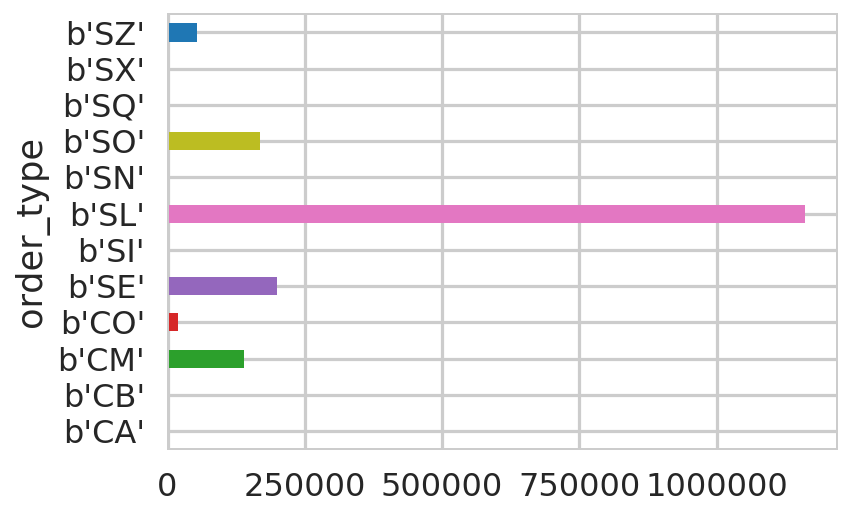

In [7]:
df.groupby('order_type')['note'].count().plot(kind='barh')

### by month

interesting:  notes appear to have rolling 12 months

In [8]:
df.groupby(pd.Grouper(key='order_date', freq='M'))['note'].count()

order_date
2007-03-31         2
2007-04-30        10
2007-05-31        42
2007-06-30        49
2007-07-31       140
2007-08-31       132
2007-09-30       164
2007-10-31       206
2007-11-30       299
2007-12-31       222
2008-01-31       274
2008-02-29       452
2008-03-31       262
2008-04-30       291
2008-05-31       385
2008-06-30       416
2008-07-31       371
2008-08-31       357
2008-09-30       444
2008-10-31       571
2008-11-30       418
2008-12-31       336
2009-01-31       414
2009-02-28       485
2009-03-31       490
2009-04-30       531
2009-05-31       476
2009-06-30       538
2009-07-31       497
2009-08-31       371
               ...  
2016-01-31       426
2016-02-29       350
2016-03-31       508
2016-04-30       582
2016-05-31       540
2016-06-30       539
2016-07-31       390
2016-08-31       484
2016-09-30       539
2016-10-31       419
2016-11-30       577
2016-12-31       388
2017-01-31       428
2017-02-28       381
2017-03-31       495
2017-04-30       343
20

### pivot for scope

by year by type

In [9]:
pd.pivot_table(df, values='note', index=['yr'], columns=['order_type'], aggfunc='count')

order_type,b'CA',b'CB',b'CM',b'CO',b'SE',b'SI',b'SL',b'SN',b'SO',b'SQ',b'SX',b'SZ'
yr,,,,,,,,,,,,
2007,NaN,NaN,1218.0,NaN,5.0,NaN,4.0,NaN,39.0,NaN,NaN,NaN
2008,NaN,NaN,4505.0,NaN,31.0,NaN,12.0,NaN,29.0,NaN,NaN,NaN
2009,NaN,NaN,5668.0,10.0,6.0,NaN,19.0,NaN,20.0,NaN,NaN,NaN
2010,NaN,NaN,6421.0,228.0,8.0,NaN,3.0,NaN,41.0,NaN,NaN,NaN
2011,NaN,NaN,6064.0,261.0,12.0,1.0,6.0,NaN,15.0,2.0,NaN,NaN
2012,NaN,NaN,5299.0,201.0,31.0,NaN,4.0,1.0,22.0,NaN,NaN,NaN
2013,NaN,NaN,5728.0,268.0,49.0,NaN,13.0,NaN,16.0,56.0,NaN,NaN
2014,NaN,NaN,5522.0,245.0,29.0,NaN,13.0,NaN,45.0,128.0,NaN,NaN
2015,NaN,NaN,5471.0,284.0,33.0,NaN,2.0,NaN,33.0,76.0,NaN,NaN


by month by type

In [24]:
pd.pivot_table(df, values='note', index=['yr','mo'], columns=['order_type'], aggfunc='count')

order_type   b'CA'  b'CB'   b'CM'   b'CO'    b'SE'  b'SI'     b'SL'  b'SN'  \
yr   mo                                                                      
2007 3         NaN    NaN     NaN     NaN      NaN    NaN       NaN    NaN   
     4         NaN    NaN     9.0     NaN      1.0    NaN       NaN    NaN   
     5         NaN    NaN    41.0     NaN      NaN    NaN       NaN    NaN   
     6         NaN    NaN    49.0     NaN      NaN    NaN       NaN    NaN   
     7         NaN    NaN   127.0     NaN      NaN    NaN       1.0    NaN   
     8         NaN    NaN   124.0     NaN      NaN    NaN       3.0    NaN   
     9         NaN    NaN   162.0     NaN      NaN    NaN       NaN    NaN   
     10        NaN    NaN   205.0     NaN      NaN    NaN       NaN    NaN   
     11        NaN    NaN   283.0     NaN      3.0    NaN       NaN    NaN   
     12        NaN    NaN   218.0     NaN      1.0    NaN       NaN    NaN   
2008 1         NaN    NaN   265.0     NaN      1.0    NaN       3.0    NaN   
     2         NaN    NaN   446.0     NaN      NaN    NaN       4.0    NaN   
     3         NaN    NaN   258.0     NaN      NaN    NaN       NaN    NaN   
     4         NaN    NaN   291.0     NaN      NaN    NaN       NaN    NaN   
     5         NaN    NaN   380.0     NaN      1.0    NaN       NaN    NaN   
     6         NaN    NaN   410.0     NaN      2.0    NaN       1.0    NaN   
     7         NaN    NaN   370.0     NaN      NaN    NaN       NaN    NaN   
     8         NaN    NaN   354.0     NaN      1.0    NaN       NaN    NaN   
     9         NaN    NaN   425.0     NaN     13.0    NaN       4.0    NaN   
     10        NaN    NaN   561.0     NaN      9.0    NaN       NaN    NaN   
     11        NaN    NaN   413.0     NaN      NaN    NaN       NaN    NaN   
     12        NaN    NaN   332.0     NaN      4.0    NaN       NaN    NaN   
2009 1         NaN    NaN   414.0     NaN      NaN    NaN       NaN    NaN   
     2         NaN    NaN   479.0     NaN      2.0    NaN       NaN    NaN   
     3         NaN    NaN   487.0     NaN      1.0    NaN       NaN    NaN   
     4         NaN    NaN   519.0     NaN      NaN    NaN      12.0    NaN   
     5         NaN    NaN   473.0     NaN      NaN    NaN       NaN    NaN   
     6         NaN    NaN   537.0     NaN      NaN    NaN       NaN    NaN   
     7         NaN    NaN   492.0     NaN      2.0    NaN       NaN    NaN   
     8         NaN    NaN   369.0     NaN      1.0    NaN       NaN    NaN   
...            ...    ...     ...     ...      ...    ...       ...    ...   
2016 1         NaN    NaN   376.0    43.0      NaN    NaN       NaN    NaN   
     2         NaN    NaN   316.0    20.0      3.0    NaN       NaN    NaN   
     3         NaN    NaN   460.0    23.0      2.0    NaN       2.0    NaN   
     4         NaN    NaN   482.0    62.0      9.0    NaN       3.0    NaN   
     5         NaN    NaN   442.0    26.0     29.0    NaN       1.0    NaN   
     6         NaN    NaN   485.0    12.0     11.0    NaN       4.0    NaN   
     7         NaN    NaN   318.0    43.0     17.0    NaN       7.0    NaN   
     8         NaN    NaN   415.0    15.0     11.0    NaN       6.0    NaN   
     9         NaN    NaN   429.0    50.0      4.0    NaN       2.0    NaN   
     10        NaN    NaN   352.0    26.0      3.0    NaN      12.0    NaN   
     11        NaN    NaN   518.0    11.0      4.0    NaN       3.0    NaN   
     12        NaN    NaN   329.0    37.0      2.0    NaN      16.0    NaN   
2017 1         NaN    NaN   398.0    12.0     11.0    NaN       2.0    NaN   
     2         NaN    NaN   319.0    28.0      3.0    NaN       6.0    NaN   
     3         NaN    NaN   444.0    29.0      6.0    NaN       5.0    NaN   
     4         NaN    NaN   283.0    38.0      5.0    NaN       1.0    NaN   
     5         4.0    NaN   601.0    95.0   1317.0    NaN    4780.0    1.0   
     6       196.0    6.0  7524.0  1970.0  16577.0    NaN  103112.0    2.0   
     7       126.0    

### Create working set

scope:  June 2017 to Jun 2018; CM, CO, SE, SL, SO, SX, SZ

In [4]:
df.index = df.order_date

In [5]:
df.index

DatetimeIndex(['2018-02-14', '2018-02-14', '2018-02-14', '2018-02-14',
               '2018-02-14', '2018-02-14', '2018-02-14', '2018-02-14',
               '2018-02-14', '2018-02-14',
               ...
               '2018-06-15', '2018-06-15', '2018-06-15', '2018-06-15',
               '2018-06-15', '2018-06-15', '2018-06-15', '2018-06-15',
               '2018-06-15', '2018-06-15'],
              dtype='datetime64[ns]', name='order_date', length=1745870, freq=None)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1745870 entries, 2018-02-14 to 2018-06-15
Data columns (total 8 columns):
order_type           object
salesorder_number    float64
note                 object
order_date           datetime64[ns]
id                   int64
chksum               object
yr                   int64
mo                   int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 119.9+ MB


In [13]:
df.loc[df.order_date == '2018-02-14',[ 'salesorder_number', 'id', 'note', 'order_type', 'chksum']]

,salesorder_number,id,note,order_type,chksum
order_date,,,,,
2018-02-14,11088929.0,1172799,11088929,b'SZ',b'\xdd\xd91`\x93\xaa\x1e\xa18\x8e\xde\xe0\x03\...
2018-02-14,11088930.0,1172800,Customer PO--- A0000223674 ATTN: Cindy Lalonde...,b'SZ',"b'\\,\xfa\x86\x8b\xfa%\xc0\xc6\xb2p\xc2\xfa\x9..."
2018-02-14,11088930.0,1172801,****Prices verified in coupa***,b'SZ',b'\xa1\xd3\xf3\xd0\x08cV\x98u\xa3\xca-\xdf\xb2...
2018-02-14,11088931.0,1172802,Customer PO--- A0000223666 ATTN: Cindy Lalonde...,b'SZ',"b'\xa5\x01\xe9\x7f*\xc3mf=]W""\x95-\xaf\xc7\x83..."
2018-02-14,11088931.0,1172803,***Prices verified in Coupa***,b'SZ',b'#9C\x89m?\xa4\xd8\xff\xc72\\\x15\xf38P\xfb\x...
2018-02-14,11088932.0,1172804,Customer PO--- A0000223663 ATTN: Nicole Van De...,b'SZ',b'$JI\xe1H\xa7\x018\xc5\x11\xfc\xa3T$\xcar\xa6...
2018-02-14,11088933.0,1172805,Customer PO--- A0000223464 ATTN: Emily Ward Fe...,b'SZ',b'6\x1dY\x14\x16\xfc\xcbK\x10\xa5\x0b`\xfa\xb6...
2018-02-14,11088933.0,1172806,***Prices verified in coupa**8,b'SZ',b'\x8f\xc7\x85\x88\xbc\x81AU\xcd>$\x8e\x1dd\x9...
2018-02-14,11088934.0,1172807,"Records room 4 way syringe leaking water, repl...",b'SL',b'j\x08\xcdUr\xdc\x1e\xf0\xc3\x8ce\xad.\xfe\xd...


In [6]:
df2 = df['2017-06-01':'2018-06-30'][['salesorder_number', 'id', 'note', 'order_type', 'chksum']]

In [7]:
df2['order_type_category'] = df2['order_type'].astype('category')

In [8]:
df2.drop('order_type', axis=1, inplace=True)

In [9]:
df2.describe()

,salesorder_number,id
count,1.682446e+06,1.682446e+06
mean,1.029688e+07,9.046475e+05
std,2.434009e+06,4.856805e+05
min,1.002465e+06,6.342500e+04
25%,1.062828e+07,4.840362e+05
50%,1.089508e+07,9.046475e+05
75%,1.116001e+07,1.325259e+06
max,1.142391e+07,1.745870e+06


In [10]:
df3 = df2.drop_duplicates(subset=['salesorder_number', 'chksum'], keep='first', inplace=False)

In [11]:
df3.drop('chksum', axis=1, inplace=True)

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1642323 entries, 2018-02-14 to 2018-06-15
Data columns (total 4 columns):
salesorder_number      1642323 non-null float64
id                     1642323 non-null int64
note                   1642323 non-null object
order_type_category    1642323 non-null category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 51.7+ MB


In [13]:
df3.head()

,salesorder_number,id,note,order_type_category
order_date,,,,
2018-02-14,11088929.0,1172799,11088929,b'SZ'
2018-02-14,11088930.0,1172800,Customer PO--- A0000223674 ATTN: Cindy Lalonde...,b'SZ'
2018-02-14,11088930.0,1172801,****Prices verified in coupa***,b'SZ'
2018-02-14,11088931.0,1172802,Customer PO--- A0000223666 ATTN: Cindy Lalonde...,b'SZ'
2018-02-14,11088931.0,1172803,***Prices verified in Coupa***,b'SZ'


In [33]:
df3.groupby('salesorder_number')['id'].count().sort_values(ascending=False)

salesorder_number
11304004.0    104
10525372.0     95
11168230.0     91
11134279.0     91
11282043.0     90
10968267.0     86
11003598.0     86
11132951.0     85
10969669.0     80
10601080.0     79
10947488.0     75
10719604.0     74
10542974.0     74
11130107.0     73
10668092.0     72
10975009.0     71
10977187.0     71
10650730.0     71
10724698.0     70
10969372.0     69
11376382.0     67
10593659.0     66
10735617.0     66
11136482.0     66
10822142.0     66
10782812.0     65
10905879.0     65
10460470.0     64
10787472.0     64
10806064.0     64
             ... 
10898126.0      1
10898127.0      1
10898132.0      1
10898139.0      1
10898140.0      1
10898146.0      1
10898152.0      1
10898153.0      1
10898066.0      1
10898065.0      1
10898059.0      1
10898042.0      1
10897941.0      1
10897951.0      1
10897953.0      1
10897954.0      1
10897961.0      1
10897966.0      1
10897991.0      1
10897993.0      1
10898001.0      1
10898003.0      1
10898010.0      1
10898016.0

In [59]:
pd.Series(range(1,100))

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
      ..
69    70
70    71
71    72
72    73
73    74
74    75
75    76
76    77
77    78
78    79
79    80
80    81
81    82
82    83
83    84
84    85
85    86
86    87
87    88
88    89
89    90
90    91
91    92
92    93
93    94
94    95
95    96
96    97
97    98
98    99
Length: 99, dtype: int64

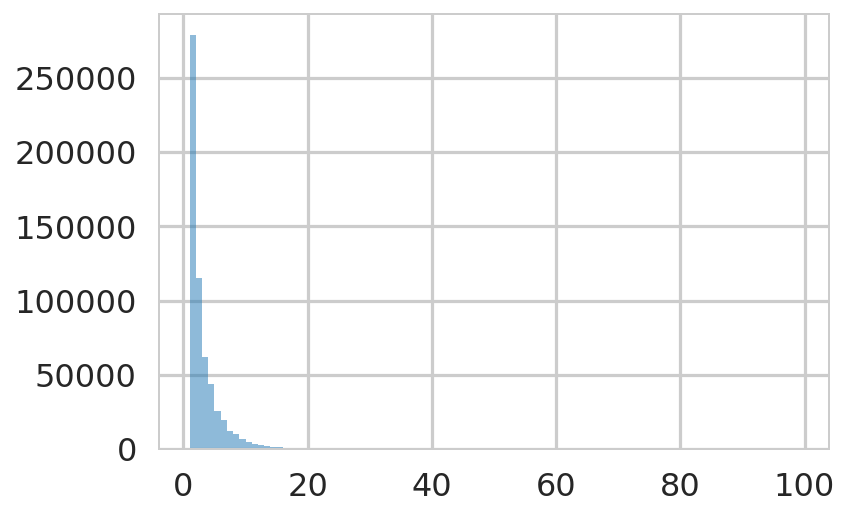

In [60]:
df3.groupby('salesorder_number')['id'].count().hist(alpha=0.5, bins=pd.Series(range(1,100)))

In [14]:
df4 = df3[df3['salesorder_number']==11282043.0]

In [28]:
df4

,salesorder_number,id,note,order_type_category
order_date,,,,
2018-04-26,11282043.0,1503682,Customer PO: C00038512,b'SL'
2018-04-26,11282043.0,1503683,Bill at $140 with NO arrival fee. Pricing as per,b'SL'
2018-04-26,11282043.0,1503684,contract,b'SL'
2018-04-26,11282043.0,1503685,"April 16, 2018",b'SL'
2018-04-26,11282043.0,1503686,Tag# 488,b'SL'
2018-04-26,11282043.0,1503687,"Dental cart with cut tubing, syringe tip crack...",b'SL'
2018-04-26,11282043.0,1503688,jar holders loose,b'SL'
2018-04-26,11282043.0,1503689,"-replace syringe tip nut, replace slow speed 4",b'SL'
2018-04-26,11282043.0,1503690,hole tubing and straighten/tighten all jar hol...,b'SL'


In [17]:
df3.to_pickle('../data/note_clean2')

In [113]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1642323 entries, 2018-02-14 to 2018-06-15
Data columns (total 4 columns):
salesorder_number      1642323 non-null float64
id                     1642323 non-null int64
note                   1642323 non-null object
order_type_category    1642323 non-null category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 91.7+ MB


In [53]:
dfs = df3.index.unique()

In [89]:
df5 = 'None'

In [90]:
if df5  :
    print ('exits') 
else:
        print ('no')

exits


In [98]:
s = 'test'
s + str(1)

'test1'

In [99]:

for i in dfs.to_period(freq='M').unique() :
    print (i)
    df_temp = df3[df3.index.to_period(freq='M') == i].pivot_table(index=['salesorder_number', 'order_date', 'order_type_category'],                               
                                     values='note',
                                     aggfunc=lambda x: ' '.join(x))
    df_temp.to_pickle('../data/note_clean3_' + str(i))
    

2018-02
2018-05
2018-06
2017-06
2018-03
2017-07
2017-08
2017-09
2018-04
2017-10
2017-11
2017-12
2018-01


In [144]:
files = [
    "../data/note_clean3_2017-06",
"../data/note_clean3_2017-07",
"../data/note_clean3_2017-08",
"../data/note_clean3_2017-09",
"../data/note_clean3_2017-10",
"../data/note_clean3_2017-11",
"../data/note_clean3_2017-12",
"../data/note_clean3_2018-01",
"../data/note_clean3_2018-02",
"../data/note_clean3_2018-03",
"../data/note_clean3_2018-04",
"../data/note_clean3_2018-05",
"../data/note_clean3_2018-06"]

df = pd.concat(map(pd.read_pickle, files))



In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 595936 entries, (1002465.0, 2017-06-01 00:00:00, b'CM') to (11423914.0, 2018-06-15 00:00:00, b'SZ')
Data columns (total 1 columns):
note    595936 non-null object
dtypes: object(1)
memory usage: 13.1+ MB


In [149]:
df.to_pickle('../data/note_clean4')

## Create model

In [3]:
df = pd.read_pickle('../data/note_clean4')

In [4]:
df.head()

,,,note
salesorder_number,order_date,order_type_category,
1002465.0,2017-06-01,b'CM',Reason Code: NRSP - No Reason Specified Reques...
1002466.0,2017-06-01,b'CA',Reason Code: DUPL - Duplicate Order Reference ...
1002467.0,2017-06-01,b'CA',Reason Code: WIOD - Wrong Item Ordered What d...
1002468.0,2017-06-01,b'CM',Shkurte Entered By: DFINLA Ref Invoice: 13...
1002469.0,2017-06-01,b'CA',Reason Code: WIOD - Wrong Item Ordered What d...


## bag of words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [8]:
def preproc (text) :
    text = re.sub('[\W]+', ' ', text.lower())
    return text

In [10]:
df['note'] = df['note'].apply(preproc)

In [11]:
def tokenizer(text) :
    return text.split()

In [14]:
df['note'].head().apply(tokenizer)

salesorder_number  order_date  order_type_category
1002465.0          2017-06-01  b'CM'                  [reason, code, nrsp, no, reason, specified, re...
1002466.0          2017-06-01  b'CA'                  [reason, code, dupl, duplicate, order, referen...
1002467.0          2017-06-01  b'CA'                  [reason, code, wiod, wrong, item, ordered, wha...
1002468.0          2017-06-01  b'CM'                  [shkurte, entered, by, dfinla, ref, invoice, 1...
1002469.0          2017-06-01  b'CA'                  [reason, code, wiod, wrong, item, ordered, wha...
Name: note, dtype: object

In [15]:
count = CountVectorizer()

In [16]:
docs = df['note'].values

In [17]:
count

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [18]:
bag = count.fit_transform(docs)

In [19]:
count.vocabulary_

{'reason': 243302,
 'code': 197435,
 'nrsp': 232913,
 'no': 232458,
 'specified': 254466,
 'requested': 245313,
 'by': 193076,
 'comments': 197867,
 'carole': 194556,
 'bisson': 191061,
 'notl': 232732,
 'ext': 208962,
 '3021': 125952,
 'jun': 221677,
 '17': 116054,
 'katharine': 222097,
 '3143': 126578,
 'entered': 207468,
 'cbisso': 195105,
 'reference': 244038,
 'invoice': 219655,
 '13155800': 57379,
 'dupl': 205082,
 'duplicate': 205088,
 'order': 235313,
 'previous': 240477,
 '13112063': 56598,
 'this': 258522,
 'should': 252746,
 'only': 234617,
 'have': 216261,
 'been': 190376,
 'free': 211909,
 'goods': 214346,
 'as': 187350,
 'per': 237754,
 'back': 189122,
 'pocket': 239350,
 'deal': 201535,
 'with': 265258,
 'eric': 207841,
 'wilson': 265118,
 'instructions': 219046,
 'were': 264828,
 'unclear': 261213,
 'cindy': 196572,
 'x5200': 288579,
 'hfx': 216723,
 'nov': 232793,
 '13': 55285,
 '2017': 119838,
 'nadine': 231338,
 '3027': 125968,
 'cull': 200137,
 'cbilbr': 195103,
 'r